# MLLab Entry Task \<FIM-username\>

## Imports

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


## Load, preprocess, clustering and visualization for Abalone dataset

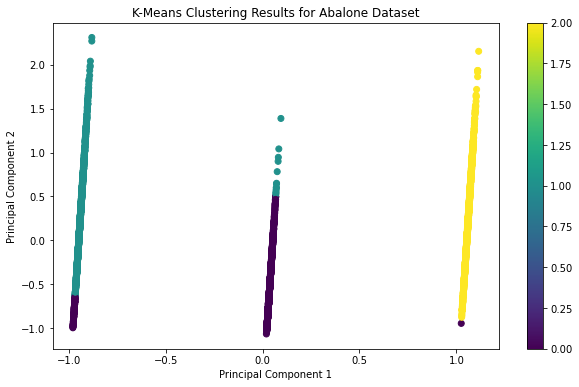

In [13]:
# Load and preprocess Abalone dataset
abalone_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", 
                         names=["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", 
                                "Viscera weight", "Shell weight", "Rings"])
abalone_df["Sex"] = abalone_df["Sex"].astype("category").cat.codes # Convert categorical feature "Sex" to numerical
abalone_X_train = abalone_df.drop(["Rings"], axis=1) # Select all features except the target feature
abalone_y_train = abalone_df["Rings"] # Select the target feature

# Clustering and Visualization for Abalone dataset
abalone_clusterer = KMeans(n_clusters=3, random_state=42)
abalone_cluster_labels = abalone_clusterer.fit_predict(abalone_X_train)

pca = PCA(n_components=2)
abalone_X_train_pca = pca.fit_transform(abalone_X_train)

# Visualize the clustering results for Abalone dataset
plt.figure(figsize=(10, 6))
plt.scatter(abalone_X_train_pca[:, 0], abalone_X_train_pca[:, 1], c=abalone_cluster_labels, cmap='viridis')
plt.title('K-Means Clustering Results for Abalone Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

## for Auto MPG dataset

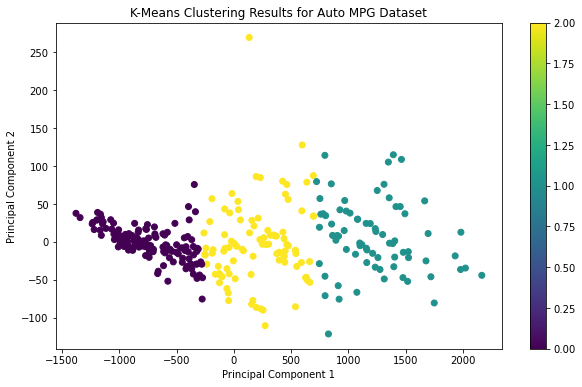

In [16]:
# Load and preprocess Auto MPG dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
df = pd.read_csv(url, sep='\s+', header=None, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name'])
df = df.drop(columns=['car name'])
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()
auto_X_train = df.drop(columns=['mpg']).values

auto_X_train, auto_X_test, auto_y_train, auto_y_test = train_test_split(df.drop(columns=['mpg']), df['mpg'], test_size=0.2, random_state=42)

# Clustering and Visualization for Auto MPG dataset
auto_clusterer = KMeans(n_clusters=3, random_state=42)
auto_cluster_labels = auto_clusterer.fit_predict(auto_X_train)

pca = PCA(n_components=2)
auto_X_train_pca = pca.fit_transform(auto_X_train)

# Visualize the clustering results for Auto MPG dataset
plt.figure(figsize=(10, 6))
plt.scatter(auto_X_train_pca[:, 0], auto_X_train_pca[:, 1], c=auto_cluster_labels, cmap='viridis')
plt.title('K-Means Clustering Results for Auto MPG Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

## Naive Baseline

In [17]:
# Abalone dataset
abalone_naive_pred = np.full_like(abalone_y_train, np.mean(abalone_y_train))
abalone_naive_mse = mean_squared_error(abalone_y_train, abalone_naive_pred)
print(f"Abalone dataset Naive Baseline MSE: {abalone_naive_mse}")

# Auto MPG dataset
auto_naive_pred = np.full_like(auto_y_test, np.mean(auto_y_train))
auto_naive_mse = mean_squared_error(auto_y_test, auto_naive_pred)
print(f"Auto MPG dataset Naive Baseline MSE: {auto_naive_mse}")

Abalone dataset Naive Baseline MSE: 11.264543931050994
Auto MPG dataset Naive Baseline MSE: 51.62029239680699


## Strong Baseline

In [18]:
# Abalone dataset
abalone_preprocessor = ColumnTransformer([
    ('num_imputer', SimpleImputer(strategy='median'), ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']),
    ('cat_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Sex'])
])

abalone_pipeline = Pipeline([
    ('preprocessor', abalone_preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

abalone_pipeline.fit(abalone_X_train, abalone_y_train)
abalone_strong_mse = mean_squared_error(abalone_y_train, abalone_pipeline.predict(abalone_X_train))
print(f"Abalone dataset Strong Baseline MSE: {abalone_strong_mse}")

#Auto MPG dataset
auto_X_train, auto_X_test, auto_y_train, auto_y_test = train_test_split(df.drop(columns=['mpg']), df['mpg'], test_size=0.2, random_state=42)

auto_preprocessor = ColumnTransformer([
    ('num_imputer', SimpleImputer(strategy='mean'), ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'])
])

auto_pipeline = Pipeline([
    ('preprocessor', auto_preprocessor),
    ('regressor', LinearRegression())
])

auto_pipeline.fit(auto_X_train, auto_y_train)
auto_strong_mse = mean_squared_error(auto_y_test, auto_pipeline.predict(auto_X_test))
print(f"Auto MPG dataset Strong Baseline MSE: {auto_strong_mse}")

Abalone dataset Strong Baseline MSE: 0.6668891548958583
Auto MPG dataset Strong Baseline MSE: 10.710864418838366


## Hyper-parameter Tuning

In [21]:
# Auto MPG dataset

# Split the data into training and validation sets
auto_X_train, auto_X_val, auto_y_train, auto_y_val = train_test_split(df.drop(columns=['mpg']), df['mpg'], test_size=0.2, random_state=42)

# Define the preprocessor
auto_preprocessor = ColumnTransformer([
    ('num_imputer', SimpleImputer(strategy='mean'), ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'])
])

# Define the pipeline
auto_pipeline = Pipeline([
    ('preprocessor', auto_preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define the hyperparameters to tune
auto_param_grid = {
    'preprocessor__num_imputer__strategy': ['mean', 'median'],
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 5, 10],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform a GridSearchCV to search for the optimal hyperparameters
auto_grid_search = GridSearchCV(auto_pipeline, auto_param_grid, cv=5, n_jobs=-1, verbose=1)
auto_grid_search.fit(auto_X_train, auto_y_train)

# Print the best hyperparameters and the corresponding validation score
print("")
print("Best hyperparameters for Auto MPG: ", auto_grid_search.best_params_)
print("Validation score for Auto MPG: ", auto_grid_search.best_score_)
print("")
print("")

# Abalone dataset
param_grid = {
    'preprocessor__num_imputer__strategy': ['mean', 'median', 'most_frequent'],
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 5, 10],
    'regressor__min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
abalone_grid_search = GridSearchCV(abalone_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the training data
abalone_grid_search.fit(abalone_X_train, abalone_y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters for Abalone:", abalone_grid_search.best_params_)
print("Best score for Abalone:", -abalone_grid_search.best_score_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best hyperparameters for Auto MPG:  {'preprocessor__num_imputer__strategy': 'mean', 'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 150}
Validation score for Auto MPG:  0.8574025812774897
Best hyperparameters for Abalone: {'preprocessor__num_imputer__strategy': 'mean', 'regressor__max_depth': 10, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}
Best score for Abalone: 4.92487779208496


## Comparison

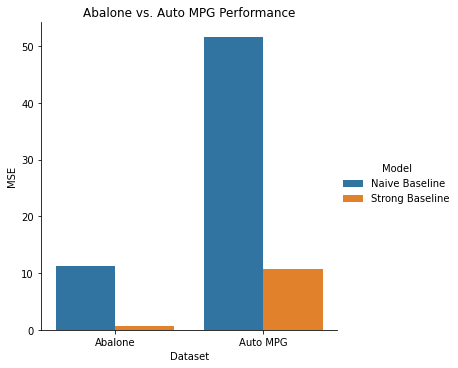

In [22]:
# Create a data frame for the MSE scores
mse_scores = pd.DataFrame({
    'Dataset': ['Abalone', 'Auto MPG'],
    'Naive Baseline': [abalone_naive_mse, auto_naive_mse],
    'Strong Baseline': [abalone_strong_mse, auto_strong_mse]
})

# Melt the data frame
mse_scores_melted = pd.melt(mse_scores, id_vars=['Dataset'], value_vars=['Naive Baseline', 'Strong Baseline'], var_name='Model', value_name='MSE')

# Create the categorical plot
sns.catplot(x='Dataset', y='MSE', hue='Model', data=mse_scores_melted, kind='bar')
plt.title('Abalone vs. Auto MPG Performance')
plt.show()
